## MA models, ARMA models and fitting
<br>  
**Objectives**  
- Analyze MA and ARMA models
- Interpret ACF/PACF plots
- Fit ARMA models to observed data
- Develop Python skills

**quick review of lec08**


**quick review of tut08**  
1. import new libraries for ARIMA model  
`import statsmodels as sm`    
`import statsmodels.api as smt`    


2. first order differencing  
`pd.Series.diff(data)`    
`diff_data.dropna()`  


3. ACF/PACF plot   
`smt.graphics.tsa.plot_acf(data, lags = 30, alpha = 0.05)`  
`smt.graphics.tsa.plot_pacf(data, lags = 30, alpha = 0.05)`  


4. generate samples (AR process)  
`arparams = np.array([0.9])`  
`ar = np.r_[1, -arparams]`  
`ma = zero_lag = np.array([1])`  
`y1 = c + sm.tsa.arima_process.arma_generate_sample(ar, ma, nsample)`

### supplementary
#### stationary
1. <span class="burk">Strictly stationary</span>: 
If $\left\{x_{t} ; t \in \mathbb{Z}\right\}$ is a strongly stationary process, then
$${x_{1}, x_{2}, x_{3}, \ldots}$$
have the same distribution function. 
$$\left(x_{1}, x_{3}\right),\left(x_{5}, x_{7}\right),\left(x_{9}, x_{11}\right), \dots .$$
have the same joint distribution function and further
$$\left(x_{1}, x_{3}, x_{5}\right),\left(x_{7}, x_{9}, x_{11}\right),\left(x_{13}, x_{15}, x_{17}\right), \ldots$$
must have the same joint distribution function, and so on.

<br>
<br>

2. <span class="burk">weakly stationary</span>:
The process $\left\{x_{t} ; t \in \mathbb{Z}\right\}$ is weakly stationary, or covariance-stationary if: 
    - the second moment of $x_{t}$ is finite for all $t,$ that is $E\left|x_{t}\right|^{2}<\infty$
for all $t$
    - the first moment of $x_{t}$ is independent of $t,$ that is $E\left(x_{t}\right)=\mu \forall t$
    - the cross moment $E\left(x_{t_{1}} x_{t_{2}}\right)$ depends only on $t_{1}-t_{2},$ that is $\operatorname{cov}\left(x_{t_{1}}, x_{t_{2}}\right)=\operatorname{cov}\left(x_{t_{1}+h}, x_{t_{2}+h}\right) \forall t_{1}, t_{2}, h$

    *ref: http://www.phdeconomics.sssup.it/documents/Lesson4.pdf*

<br>
<br>

3. why stationary: 
    - we are trying to get the population ACF and PACF from sample ACF and sample PACF. However, the results are only valid under the assumption that the time series has the property of being stationary. Otherwise, the sample ACF and PACF cannot converge to the population ACF and PACF.
    - Consider the examples below: stationary series is the easiest to be forecasted.
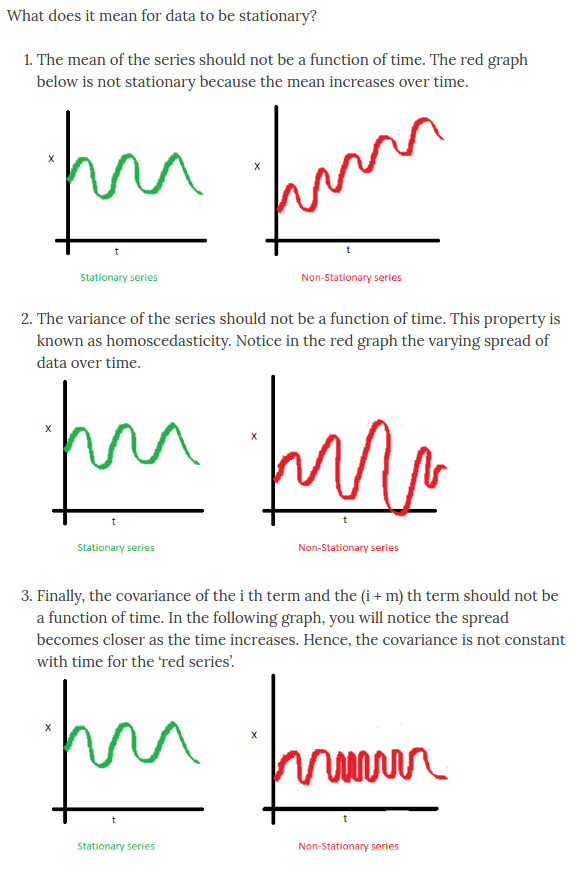


#### Hypothesis testing
1. AD Fuller: check if the residual is stationary (whether your residual had any heterocedasticity).  
    - $H_0$: there is a unit root for the series. -> the series will follow the random walk and is non-stationary  
    - $H_1$: there is no unit root for the series. -> the series is stationary
    <span class="girk">unit root: a negative shock (e.g: recession) will influence the time series permenantly</span>


2. LB test: check if there exist significant auto-correlation in the first k lags.
    - $H_0$:The data are independently distributed
    - $H_1$: The data are not independently distributed. -> the data exhibit auto-correlation.

### Overview
In this week, we will continue the topic of ARIMA model.

#### MA(q) process:
Rather than using past values of the forecast variable in a regression, a moving average process uses <span class="girk">past model errors</span> in a regression-like way.

An MA(q) could be viewed as:

$$y_{t}=c+\varepsilon_{t}+\theta_{1} \varepsilon_{t-1}+\theta_{2} \varepsilon_{t-2}+\cdots+\theta_{q} \varepsilon_{t-q}$$

Notice that each value of $y_t$ can be thought of as a weighted moving average of the past few errors. However, moving average process <span class="girk">should not be confused with the moving average smoothing</span> we discussed in time series decomposition. A moving average process defines how the time series process evolves and can be used for forecasting future values, while moving average smoothing is mainly used for revealing the trend-cycle of past values in our context.

#### Invertibility: 

It is possible to <span class="girk">write any stationary AR(p) model as an MA(∞) mode</span>l.
For example, using repeated substitution, we can demonstrate this for an AR(1) model:

$$
\begin{array}{l}{y_{t}=c+\phi_{1} y_{t-1}+\varepsilon_{t}} \\ {=c+\phi_{1}\left(\phi_{1} y_{t-2}+\varepsilon_{t-1}\right)+\varepsilon_{t}} \\ {=c+\phi_{1}^{2} y_{t-2}+\phi_{1} \varepsilon_{t-1}+\varepsilon_{t}} \\ {\cdots} \\ {=c+\phi_{1}^{k} y_{t-k}+\cdots+\phi_{1}^{2} \varepsilon_{t-2}+\phi_{1} \varepsilon_{t-1}+\varepsilon_{t}}\end{array}
$$

Provided $-1<\phi_{1}<1,$ the value of $\phi_{1}^{k}$ will get smaller as k gets larger. Therefore, eventually we have:
$$
y_{t}=c+\varepsilon_{t}+\phi_{1} \varepsilon_{t-1}+\phi_{1}^{2} \varepsilon_{t-2}+\phi_{1}^{3} \varepsilon_{t-3}+\cdots
$$
which is an MA(∞) process.

Alternatively, we can write any invertible MA(q) process as an AR(∞) process.
For example, consider the MA(1) model:

$$
\begin{array}{l}{y_{t}=c+\theta_{1} \varepsilon_{t-1}+\varepsilon_{t}} \\ {=c+\theta_{1}\left(y_{t-1}-c+\theta_{1} \varepsilon_{t-2}\right)+\varepsilon_{t}} \\ {=c\left(1-\theta_{1}+\theta_{1}^{2}\right)-\left[(-1)^{1} \theta_{1} y_{t-1}+(-1)^{2} \theta_{1}^{2} y_{t-2}\right]+\varepsilon_{t}} \\ {\cdots} \\ {=c\left(1-\theta_{1}+\theta_{1}^{2}-\theta_{1}^{3}+\cdots\right)-\sum_{i=1}^{\infty}(-1)^{i} \theta_{1}^{i} y_{t-i}+\varepsilon_{t}}\end{array}
$$

Mathematically, only when $\left|\theta_{1}\right|<1,$ the above expansion is meaningful. In
fact, $\left(1-\theta_{1}+\theta_{1}^{2}-\theta_{1}^{3}+\cdots\right)$ is divergent when $\left|\theta_{1}\right|>1 .$ 

For example, when $\theta_{1}=1,$ do you think the sum of $1-\theta_{1}+\theta_{1}^{2}-\theta_{1}^{3}+\cdots$ is 1 or 0? Hence we require $\left|\theta_{1}\right|<1$, so the most recent observations have higher weight than observations from the more distant past. Thus, the process is invertible when $\left|\theta_{1}\right|<1$, which is similar to the stationarity constraints. <span class="burk">When $\left|\theta_{1}\right|>1$, we have shown that $y_t$ can only be expanded as the weighted sum of future observations</span> in Lecture 8.

#### What are the invertibility constraints for MA(2) model?

For $\mathrm{MA}(2)$ model, we should have the following constraints: $\left|\theta_{2}\right|<1, \theta_{1}+$
$\theta_{2}<-1$ and $\theta_{1}-\theta_{2}<1$


#### ARIMA(p,d,q) processes:

For a ARMA(p,q) process:

$$
y_{t}=c+\phi_{1} y_{t-1}+\cdots+\phi_{p} y_{t-p}+\theta_{1} \varepsilon_{t-1}+\cdots+\theta_{q} \varepsilon_{t-q}+\varepsilon_{t}
$$

When p = q = 0, the model is called the white noise process.
When q = 0, the model is called AR(p) process.
When p = 0, the model is called MA(q) process.

We are only interested in stationary ARMA processes. Obviously many observed time series do not look like a time series generated from stationary process, thus we will have difficulties to model it with ARMA processes. Therefore, we take d-th order difference transform to obtain a stationary input, and then model the resulting new time series with an ARMA process. In this case, the model becomes an ARIMA(p,d,q) process for the given observed time series (non-differencing) .


### 1. Define MA(q) or ARMA(p,q) in `statsmodels`

#### Step 1: Set parameters for MA or ARMA processes

Import required librarieS

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# for ARIMA model and ACF/PACF plot
import statsmodels as sm
import statsmodels.api as smt

# ignore warning
import warnings
warnings.simplefilter('ignore')

In [2]:
# set figsize
from pylab import rcParams
rcParams['figure.figsize'] = 16,6

In [6]:
# Set up the parameters
np.random.seed(1)

arparams = np.array([0.9])
zero_lag = np.array([1])
maparams = np.array([0.6, -0.5]) # ma(2)

ar = np.r_[1, -arparams]  # add zero-lag (coefficient 1) and negate
ma = np.r_[1, maparams]   # add zero-lag

c = 0
sigma2 = 1

In [ ]:
AR(1): y_t = c + 0.9*y_{t-1} + e_t
    
MA(2): y_t = c + 0.6*e_{t-1} - 0.5*e_{t-2} + e_t
    
ARMA(1,2): y_t = c + 0.9*y_{t-1} + 0.6*e_{t-1} - 0.5*e_{t-2} + e_t

<span class="burk">Question:  Why do we use ar = np.r_[1, -arparams] to define AR coefficient?</span>

Note that we add a negative sign in front of arparams. The reason for this is, we write a general ARMA process in the following way:
$$
y_{t}=c+\phi_{1} y_{t-1}+\cdots+\phi_{p} y_{t-p}+\theta_{1} \varepsilon_{t-1}+\cdots+\theta_{q} \varepsilon_{t-q}+\varepsilon_{t}
$$
But `statsmodels` defines an ARMA process as
$$
y_{t}=c-\phi_{1} y_{t-1}-\cdots-\phi_{p} y_{t-p}+\theta_{1} \varepsilon_{t-1}-\cdots-\theta_{q} \varepsilon_{t-q}+\varepsilon_{t}
$$

Given the definition in the python code, we have $\phi_1 = 0.9$ with p = 1, $\theta_1 = 0.6$, $\theta_2 = -0.5$ with q = 2.

It is `statsmodels`'s requirement that we must add 1 for both AR and MA coefficients.

In [ ]:
y_t = c + AR() + MA() + e_t

y_t = - AR() + c + e_t + MA()

#### Step 2: Define an MA process with the given coefficients

With the `statsmodels` libraries, an ARMA model is given by an ARMA model object (Object is python term). The following code shows you how: 

In [13]:
# MA(2): Yt = 0.6 * e_{t-1} - 0.5 * e_{t-2} + e_t
ma_model = smt.tsa.arima_process.ArmaProcess(ar = zero_lag, ma = ma) 

# Check if it is stationary:
# phi_1 = 0 
# -> abs(phi_1) <= 1, thus stationary
print("MA Model is{0}stationary".format(" " if ma_model.isstationary else " not " ))

# Check if it is invertible:
# theta_1 = 0.6, theta_2 = -0.5 
# -> theta_1 - theta_2  = 1.1 > 1, thus not invertible
print("MA Model is{0}invertible".format(" " if ma_model.isinvertible else " not " ))

# Plot (theoretical) ACF
plt.figure()
plt.stem(ma_model.acf(50)); # lag50

MA Model is stationary
MA Model is not invertible


In [14]:
if ma_model.isstationary == True:
    print("MA Model is stationary")
else: # if if ma_model.isstationary == False
    print("MA Model is not stationary")

NameError: name 'ma_model' is not defined

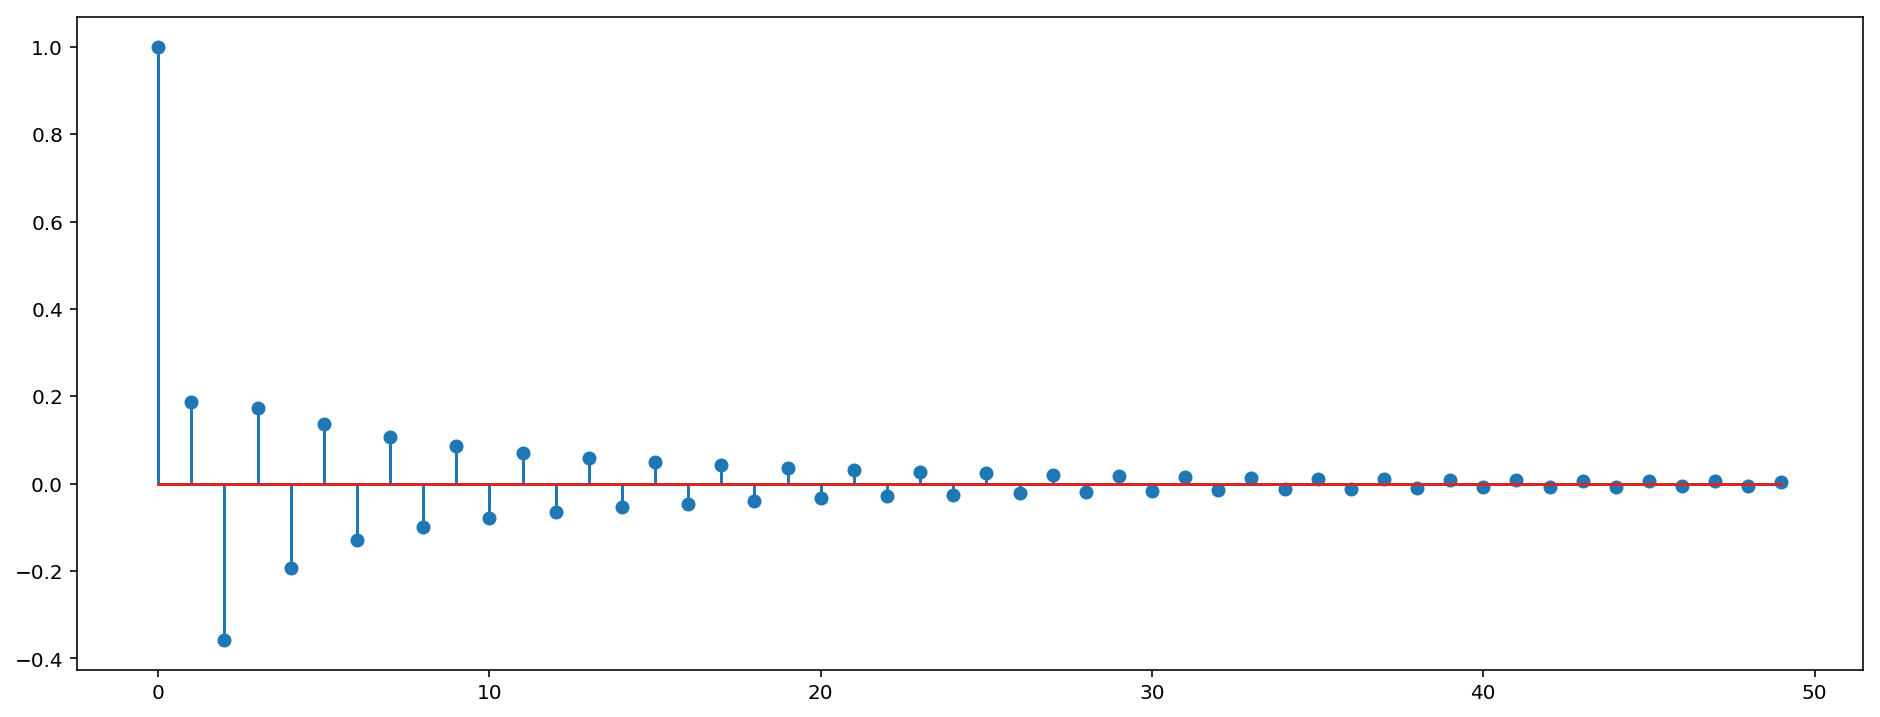

In [7]:
# Plot (theoretical) PACF
plt.figure()
plt.stem(ma_model.pacf(50));

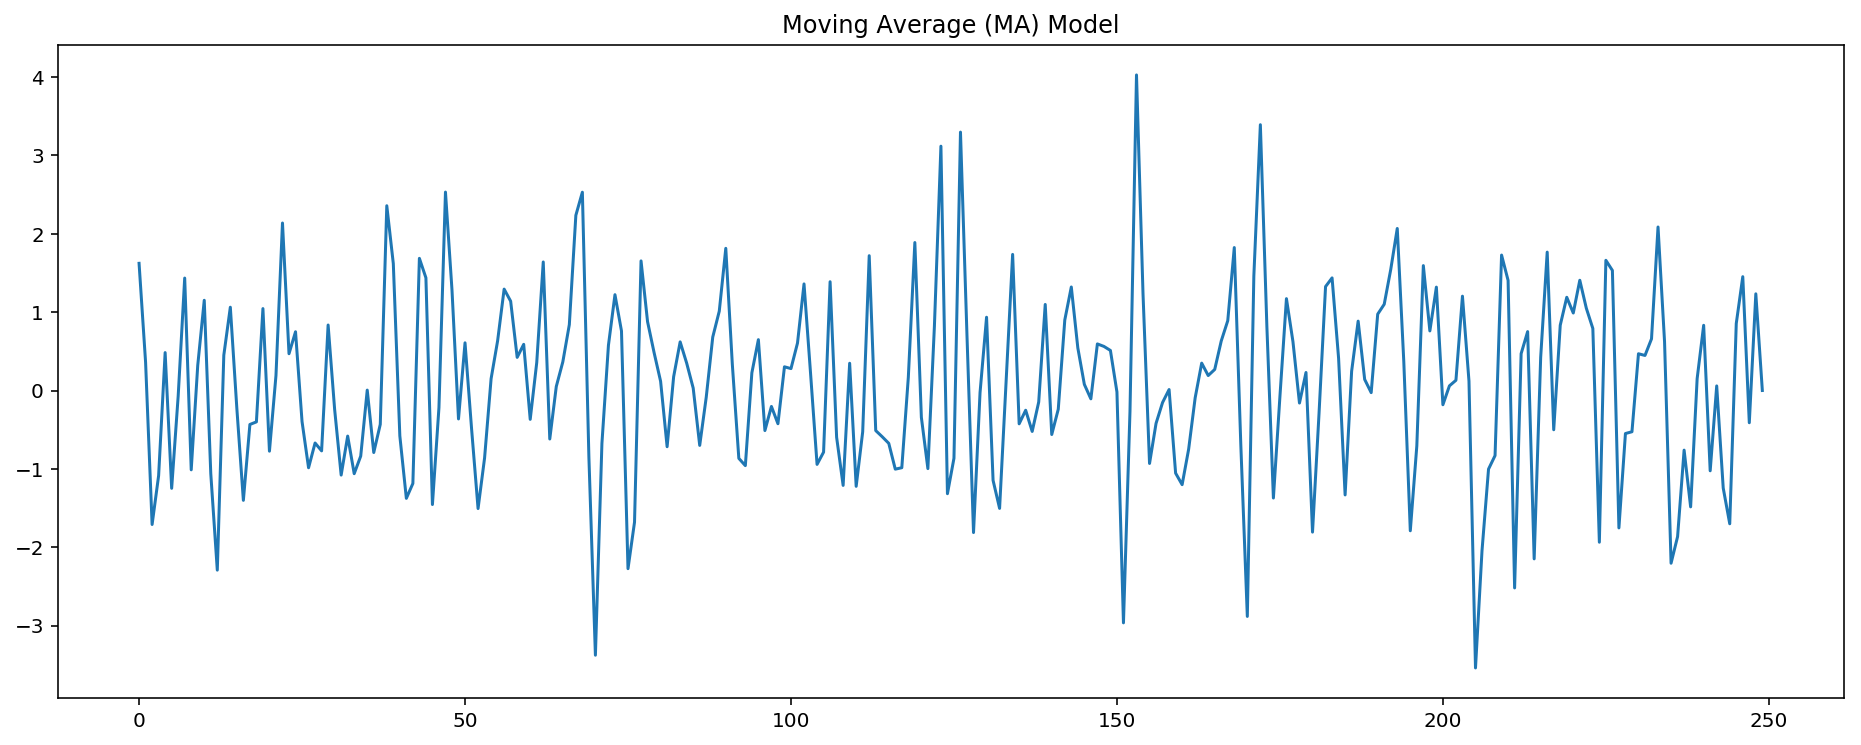

In [9]:
# Generate samples
n_samples = 250

# Yt = c + e_t + 0.6e_{t-1} - 0.5 e_{t-2}
y2 = c + ma_model.generate_sample(n_samples)

plt.figure()
plt.plot(y2)
plt.title("Moving Average (MA) Model");

**Note 1:**  
The first statement creates an ARMA model. As we set `ar = zero_lag` which is 1, so we end up with an MA model.   
Actually `sm.tsa.arima_process.ArmaProcess` produces for theoretical analysis. It is unfortunately it only produces a process without the intercept c (i.e., c = 0).

**Note 2:**   
We can produce the **theoretical** ACF and PACF in statements 5 and 6 **BEFORE** we generate any samples!

**Note 3:**  
After we have created an ARMA model object (in this example, an MA(2) model object), we can produce time series sample, as shown in the statement for $y_2$.

#### Step 3. Test the Sample ACF and PACF
Now we show the sample ACF and PACF from the time series y2.

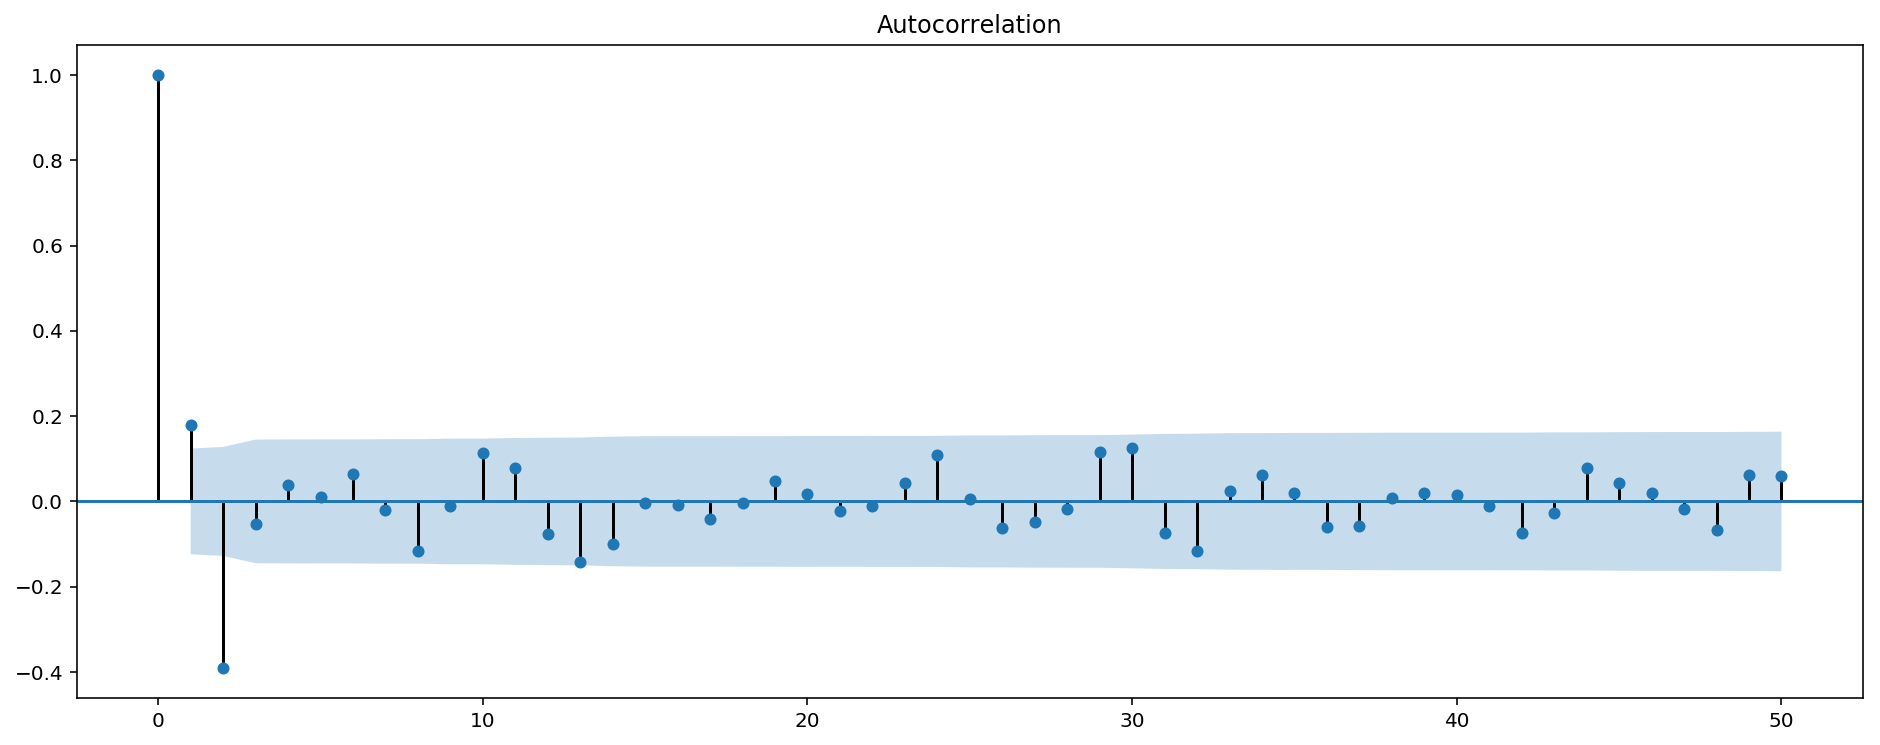

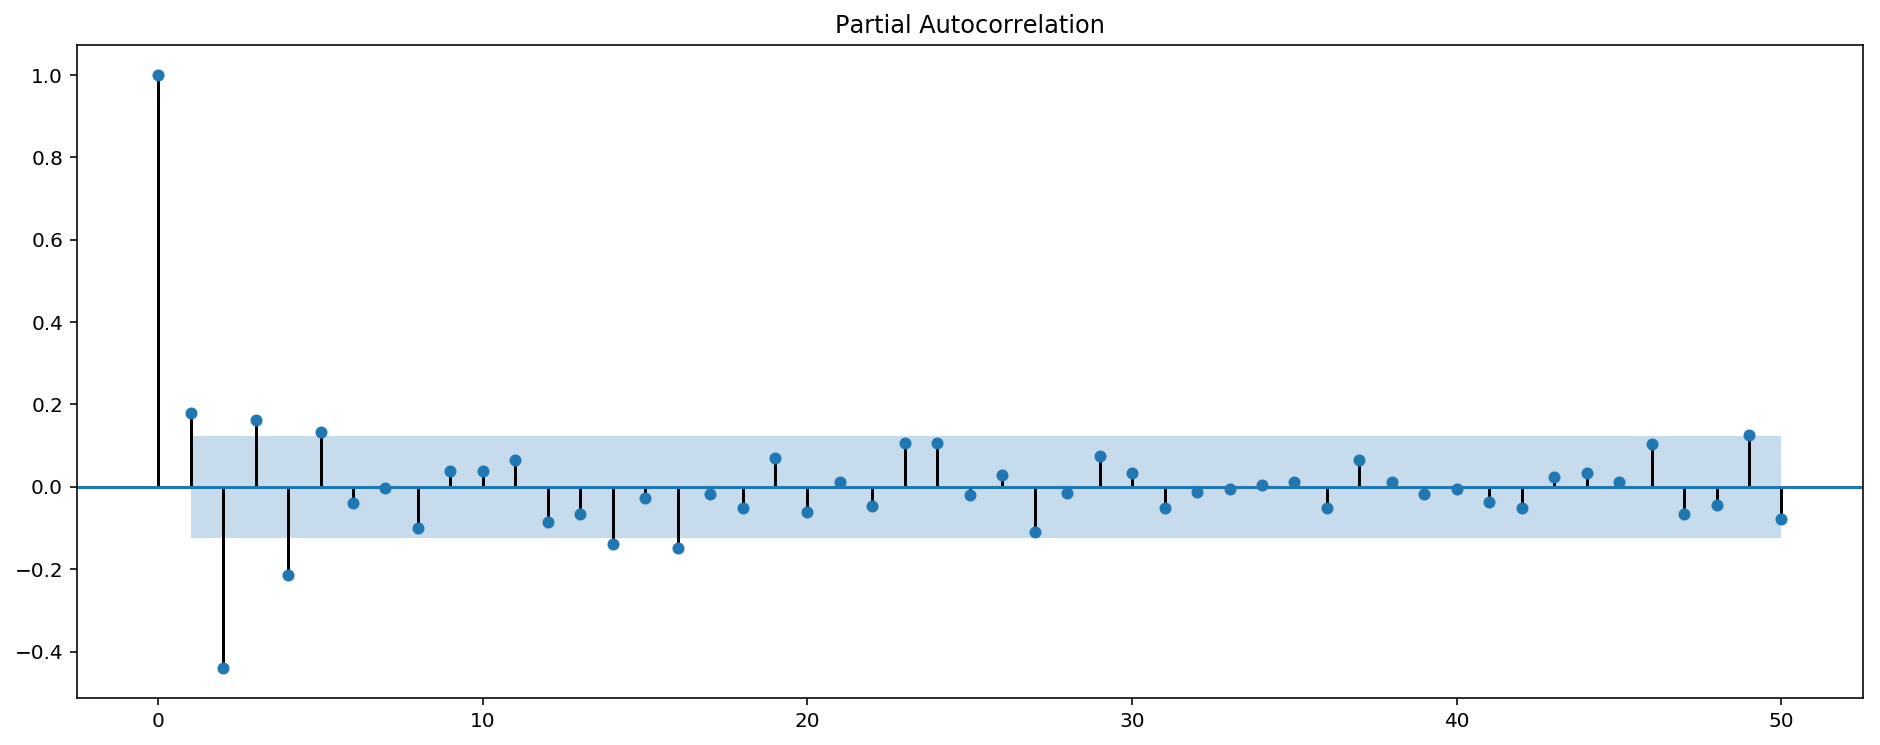

In [11]:
smt.graphics.tsa.plot_acf(y2, lags = 50, alpha = 0.05)
smt.graphics.tsa.plot_pacf(y2, lags = 50, alpha = 0.05);

You may compare these sample ACF and PACF with the theoretical ACF and PACF.

Calculate the unconditional mean and variance.


In [15]:
# Mean
# Since epsilon_t ~ N(0, sigma^2)
# then E(epsilon_t) = 0
y2_mean = c
print(y2_mean)

# Variance
# c is constant so var(c) = 0
# var(epsilon_t) = sigma^2
# then var(y2) = sigma^2 * (1 + theta_1^2 + theta_2^2)
y2_variance = sigma2 * (1 + maparams[0]**2 + maparams[1]**2) # sigma2 = 1, defined in step 1
print(y2_variance)

0
1.6099999999999999


#### Step 4. Define an ARMA process

Now combine both AR and MA parameters to produce an ARMA process

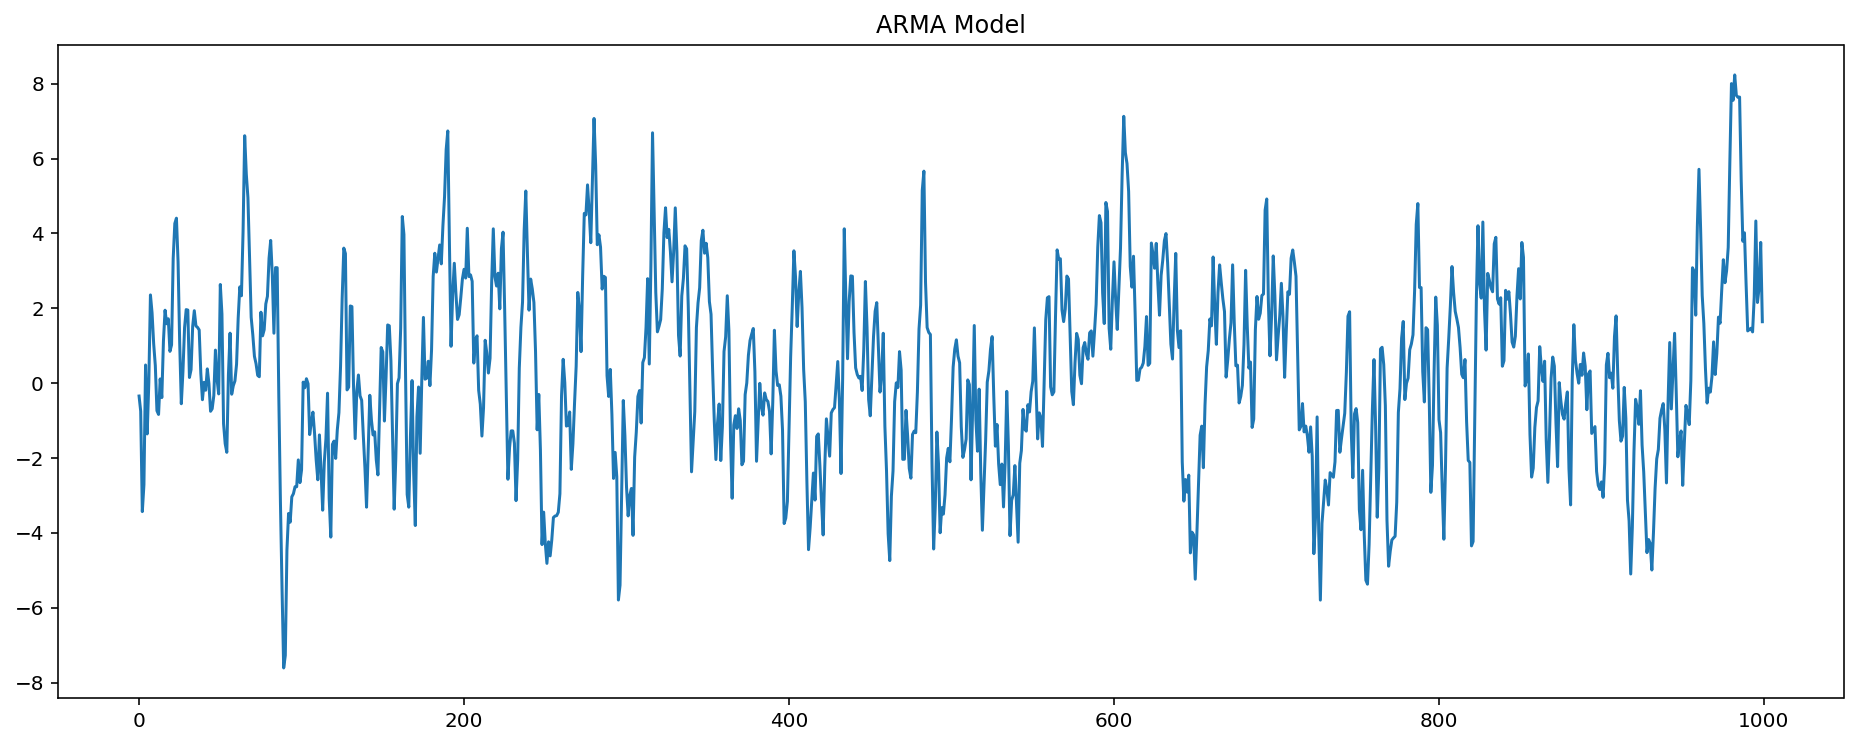

In [12]:
arma_model = sm.tsa.arima_process.ArmaProcess(ar = ar, ma = ma) 
# yt = c + 0.9y_t-1 + 0.6 et-1 + (-0.5)et-2 + et
# phi_1 = 0.9

n_samples = 1000

# ARMA(1, 2)
# Y2 = 0.6e_{t-1} - 0.5 e_{t-2} + e_t 

# Y3 = 0.9Y_{t-1} + 0.6e_{t-1} - 0.5 e_{t-2} + e_t 
y3 = arma_model.generate_sample(n_samples)

plt.figure()
plt.plot(y3)
plt.title("ARMA Model");

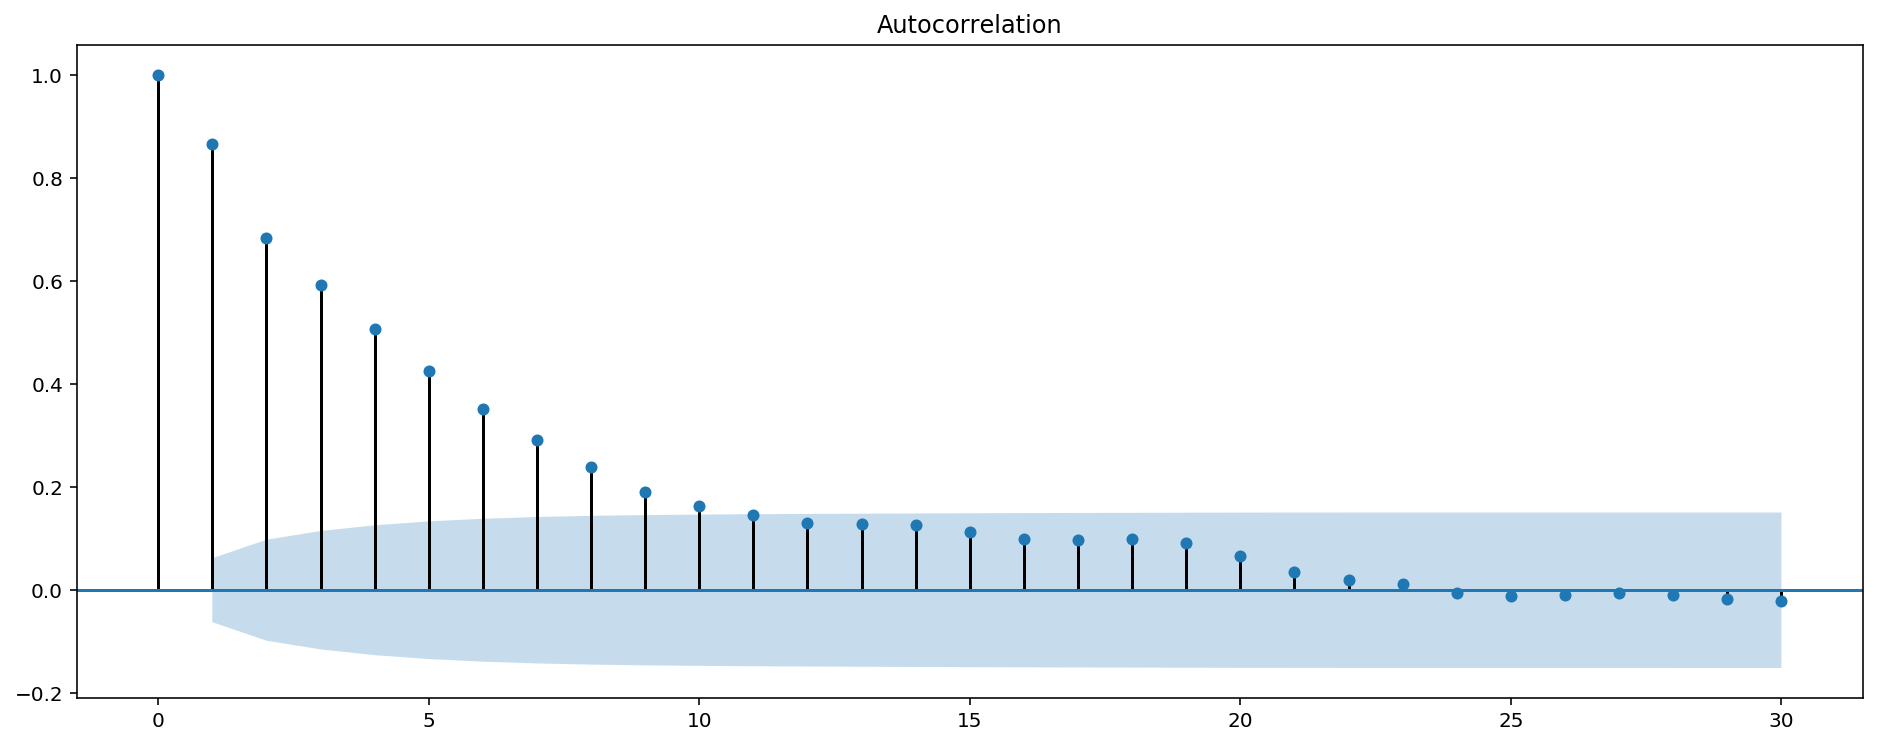

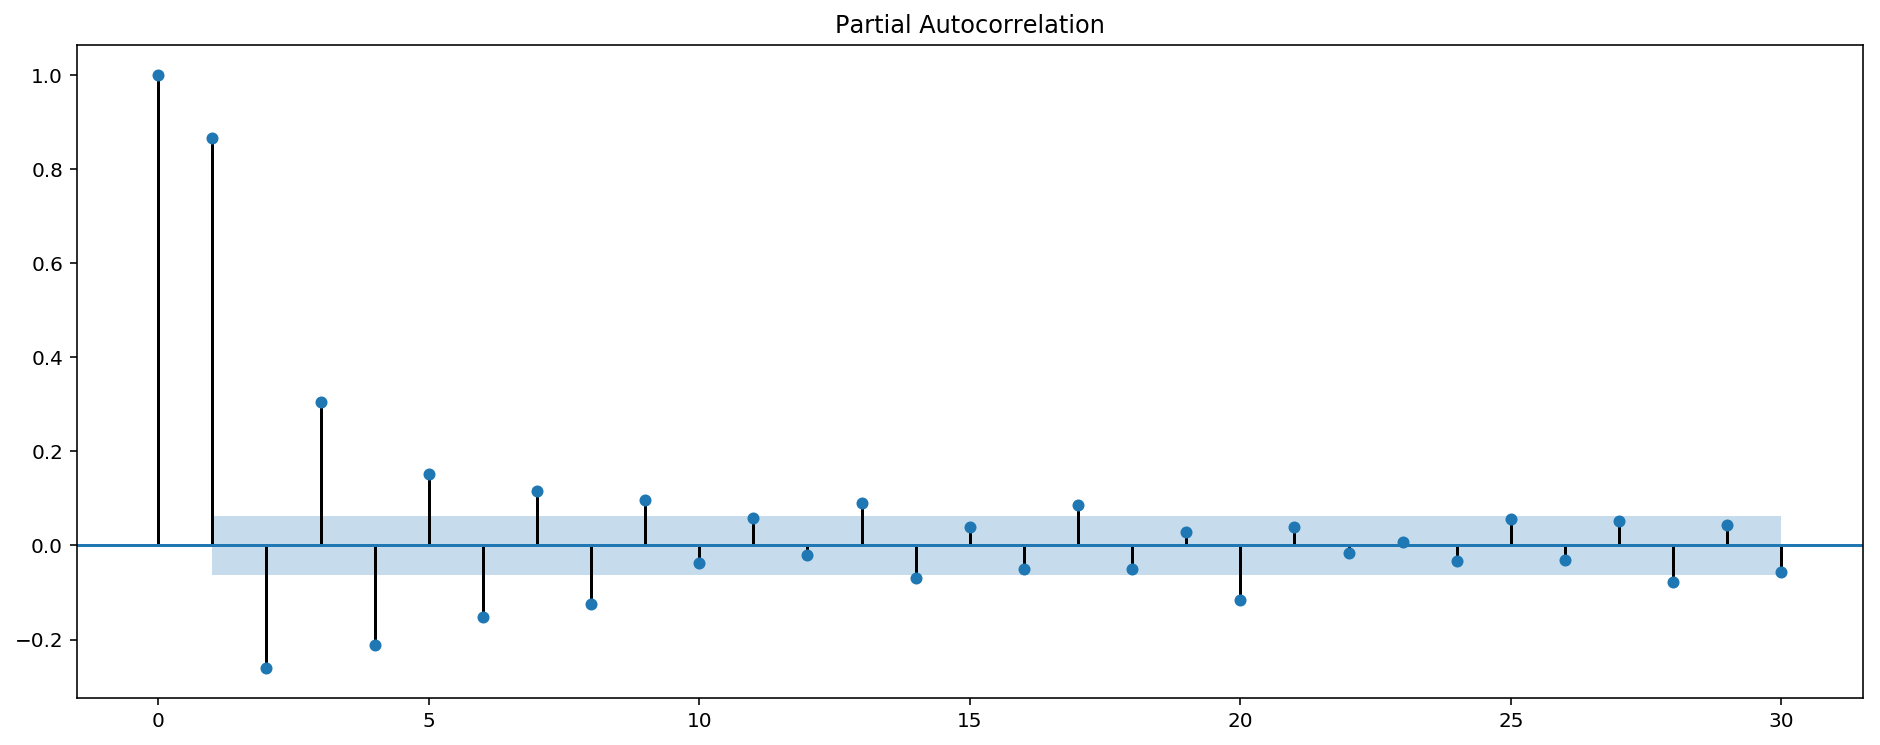

In [13]:
smt.graphics.tsa.plot_acf(y3, lags = 30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(y3, lags = 30, alpha = 0.05);

Question: How to produce theoretical ACF and PACF for this process?

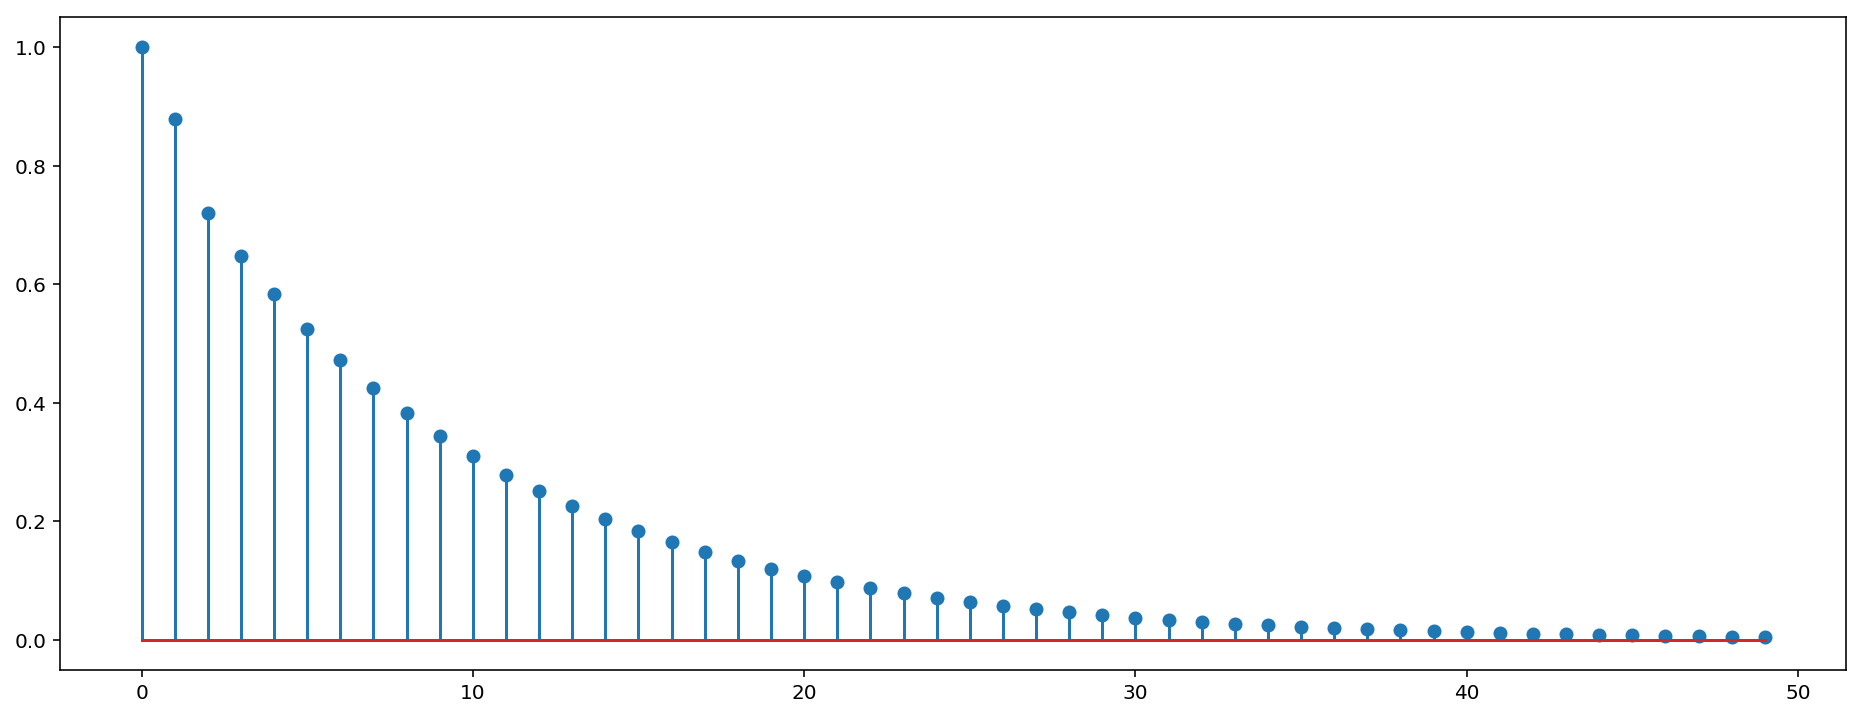

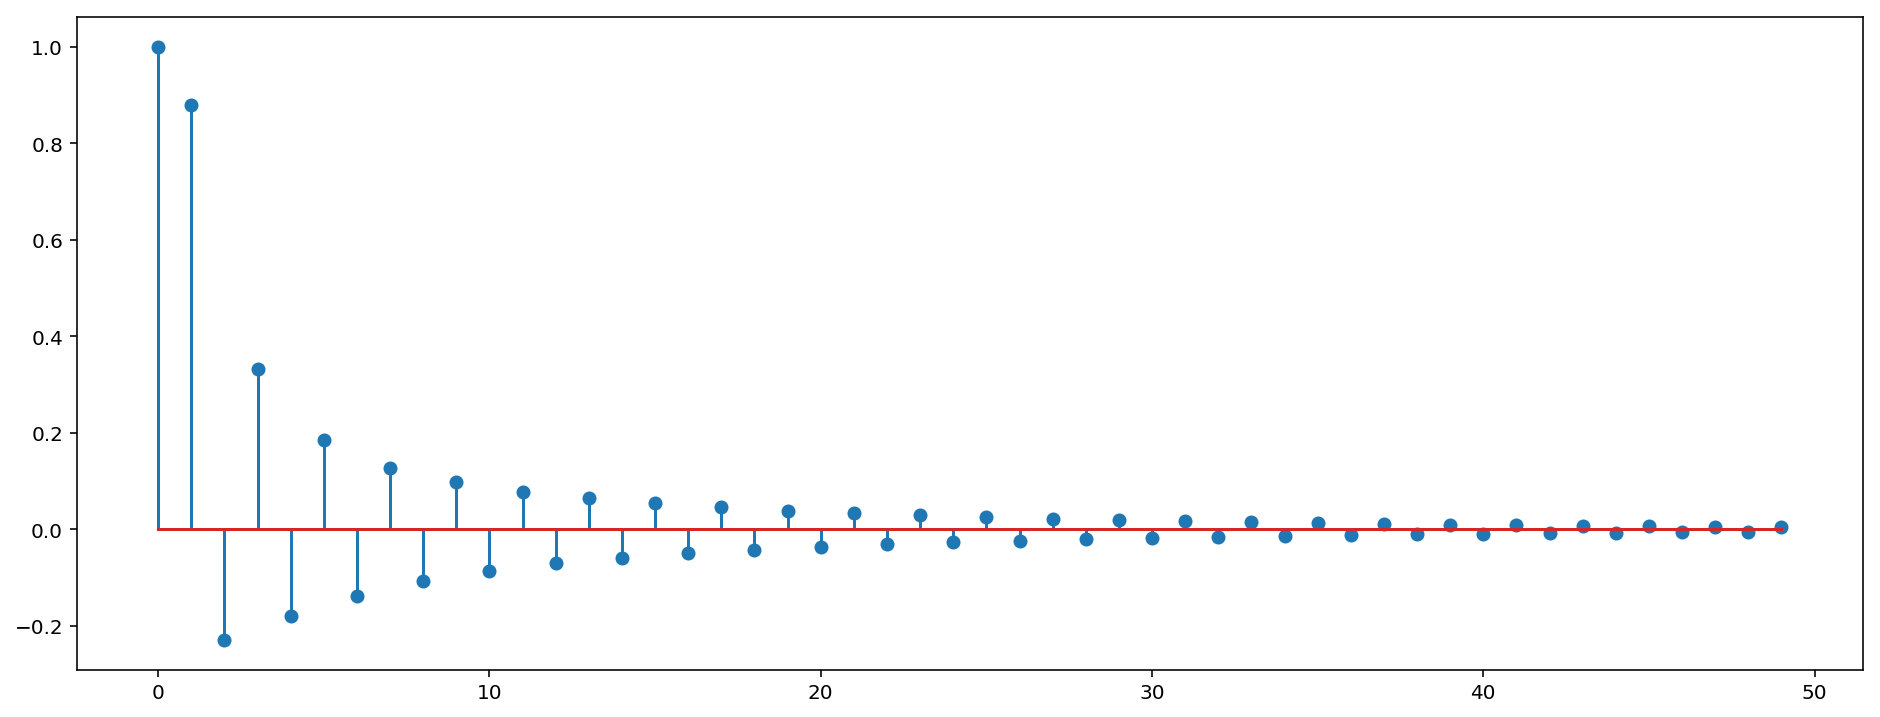

In [18]:
# acf
plt.figure()
plt.stem(arma_model.acf(50));

# pacf
plt.figure()
plt.stem(arma_model.pacf(50));

#### Step 5. Model Fitting

Now let's try and fit a model to these samples and compare the parameters with those that we actually specified. 

In [18]:
# Lets try and fit the model back
# (0, 2) refers to the number of parameters in the (AR, MA) parts respectively

model_y2 = sm.tsa.arima_model.ARMA(y2, (0, 2)).fit(trend = 'nc') # MA(2), 0.5, -0.6
# trend = {'c','nc'}: ‘c’ includes constant, ‘nc’ no constant.

print("Estimated Model Parameters: " + str(model_y2.params))

model_y3 = sm.tsa.arima_model.ARMA(y3, (1, 2)).fit(trend = 'nc') # ARMA(1,2). 0.9, 0.5, -0.6

print("Estimated Model Parameters: " + str(model_y3.params))

Estimated Model Parameters: [ 0.46696798 -0.53301009]
Estimated Model Parameters: [ 0.89849285  0.48763963 -0.46175644]


**Note:**  
<span class="burk">Check how we produce an ARMA from a sample time series by comparing the first statement here with the first statement in step 2? What is the difference?</span> 

In [ ]:
# step 2
ma_model = sm.tsa.arima_process.ArmaProcess(ar = zero_lag, ma = ma) 
n_samples = 250
y2 = c + ma_model.generate_sample(n_samples)

# step 4
arma_model = sm.tsa.arima_process.ArmaProcess(ar = ar, ma = ma)
n_samples = 1000
y3 = arma_model.generate_sample(n_samples)

# step 5
model_y2 = sm.tsa.arima_model.ARMA(y2, (0, 2)).fit(trend='nc')
model_y3 = sm.tsa.arima_model.ARMA(y3, (1, 2)).fit(trend='nc')

### 2. Forecasting with ARIMA

In the previous task, we have learnt how to define a theoretical ARMA process for given model parameters and how to train an ARMA model on a given time series data by using `statsmodel` library. In this task, we will use ARIMA model to forecast the `AirPassengers` dataset.

#### Step 1. Load the dataset

Download the dataset from the Canvas website, and then copy the following code to your python editor.

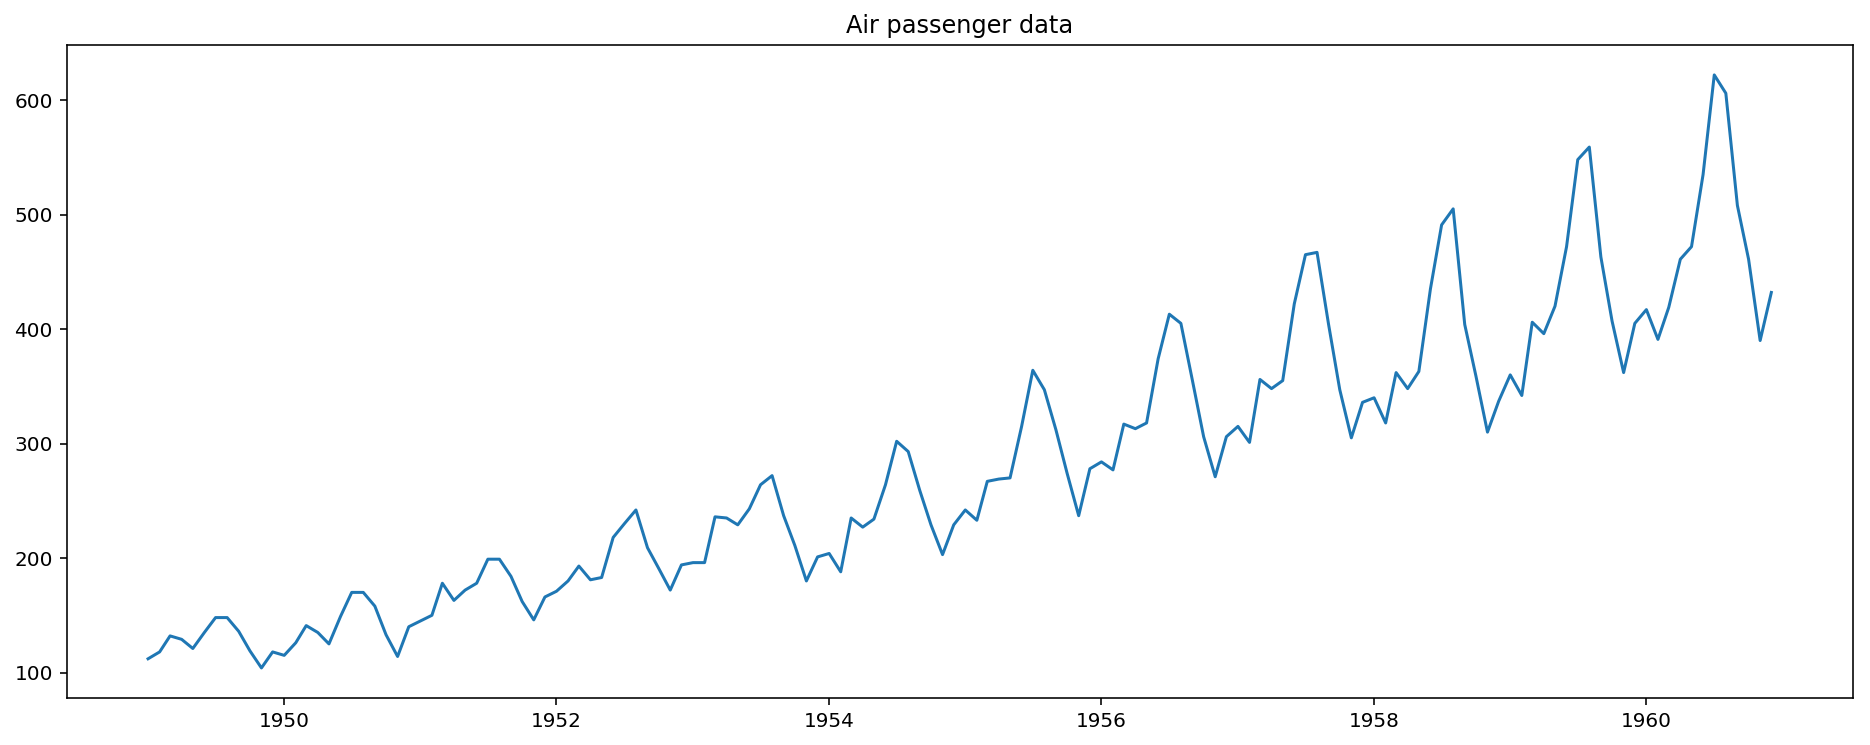

In [23]:
# load the dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
airdata = pd.read_csv('AirPassengers.csv', 
                      parse_dates = ['Month'], 
                      index_col = 'Month',
                      date_parser = dateparse)

ts = airdata['Passengers']

plt.figure()
plt.plot(ts)
plt.title("Air passenger data");

#### Step 2. Log transform

Check the figures. We notice the <span class="mark">peak within each period is increasing significantly</span>. Recall in week04 tutorial, when we do the additive decomposition, we applied the log transform so that we could penalize the high peak and increase the low peak. Here, we do the same transform to <span class="mark">stabilize the magnitude</span>.

Run the following code and compare the log plot with the original plot.

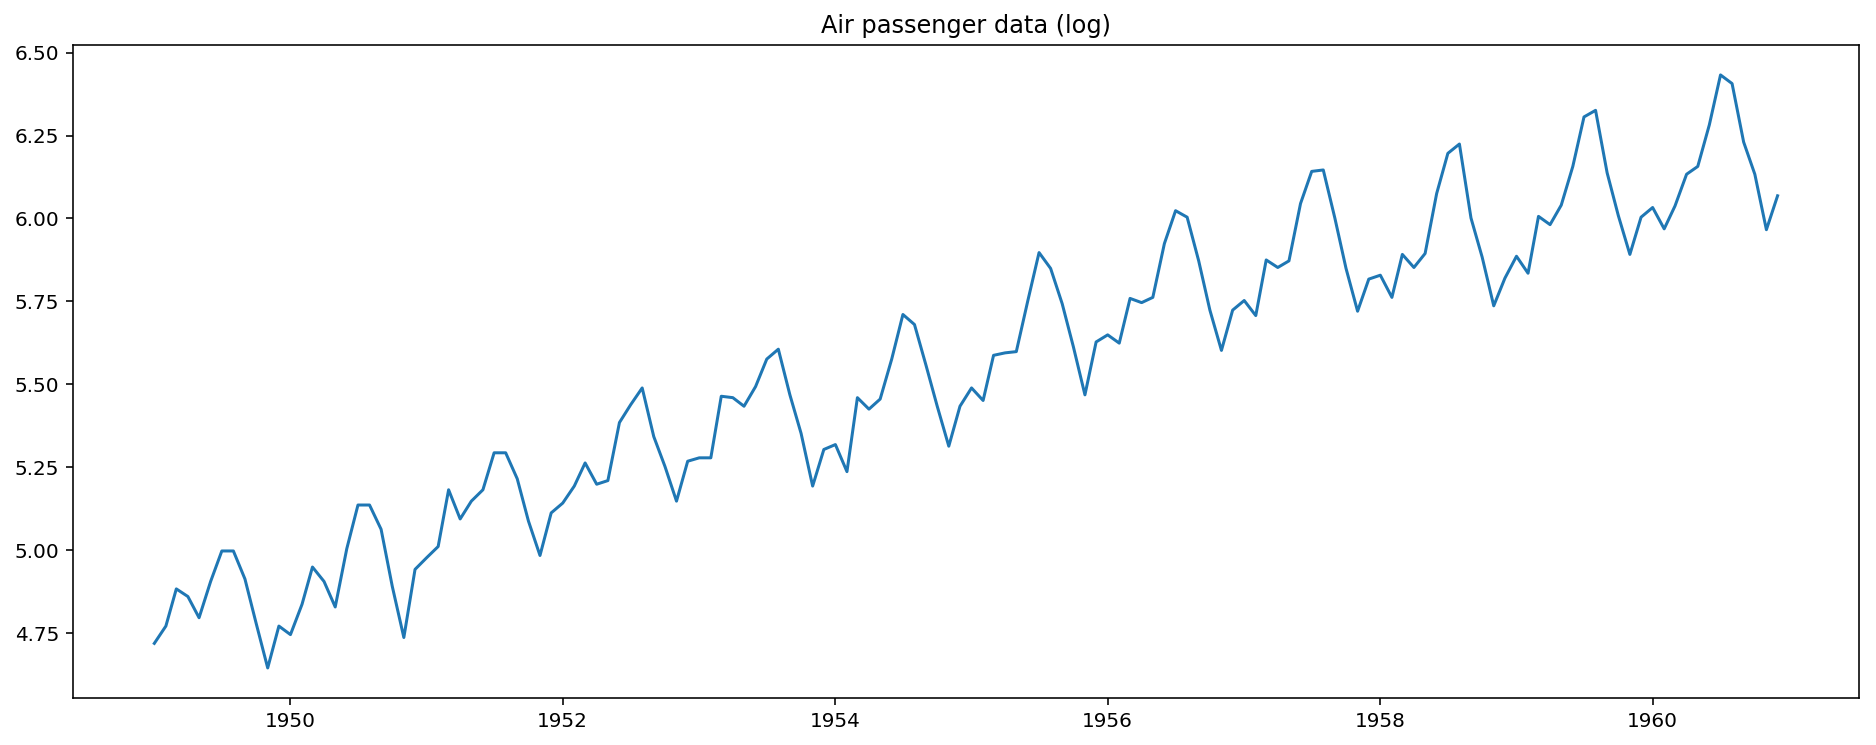

In [24]:
# log the data
ts_log = np.log(ts) # np.log1p(ts)   y -> log(y+1)

plt.figure()
plt.plot(ts_log)
plt.title("Air passenger data (log)");

#### Step 3. $1^{st}$ differencing

Clearly the transformed sequence is not stationary. Though statmodel library’s ARIMA(p,d,q) does not require a stationary data as input, we still <span class="mark">need to know the best fitting integrated value d</span>. Therefore, we need to do the 1st order difference. If the 1st order difference is still not stationary, we then do 2nd diff, etc … until we decide an appropriate order. Here, we firstly start with trying the 1st order difference.

In [25]:
# take the 1st order diff
# pd.Series.diff()
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

**Question**:   
<span class="burk">Why we need to call `dropna()` function in here?</span>

In [ ]:
# recall the diff function formula

Check the size of the ts_log_diff variable.

In [26]:
np.shape(ts_log_diff) # ts_log = 144

(143,)

Check your 1st order difference figure and compare with this:

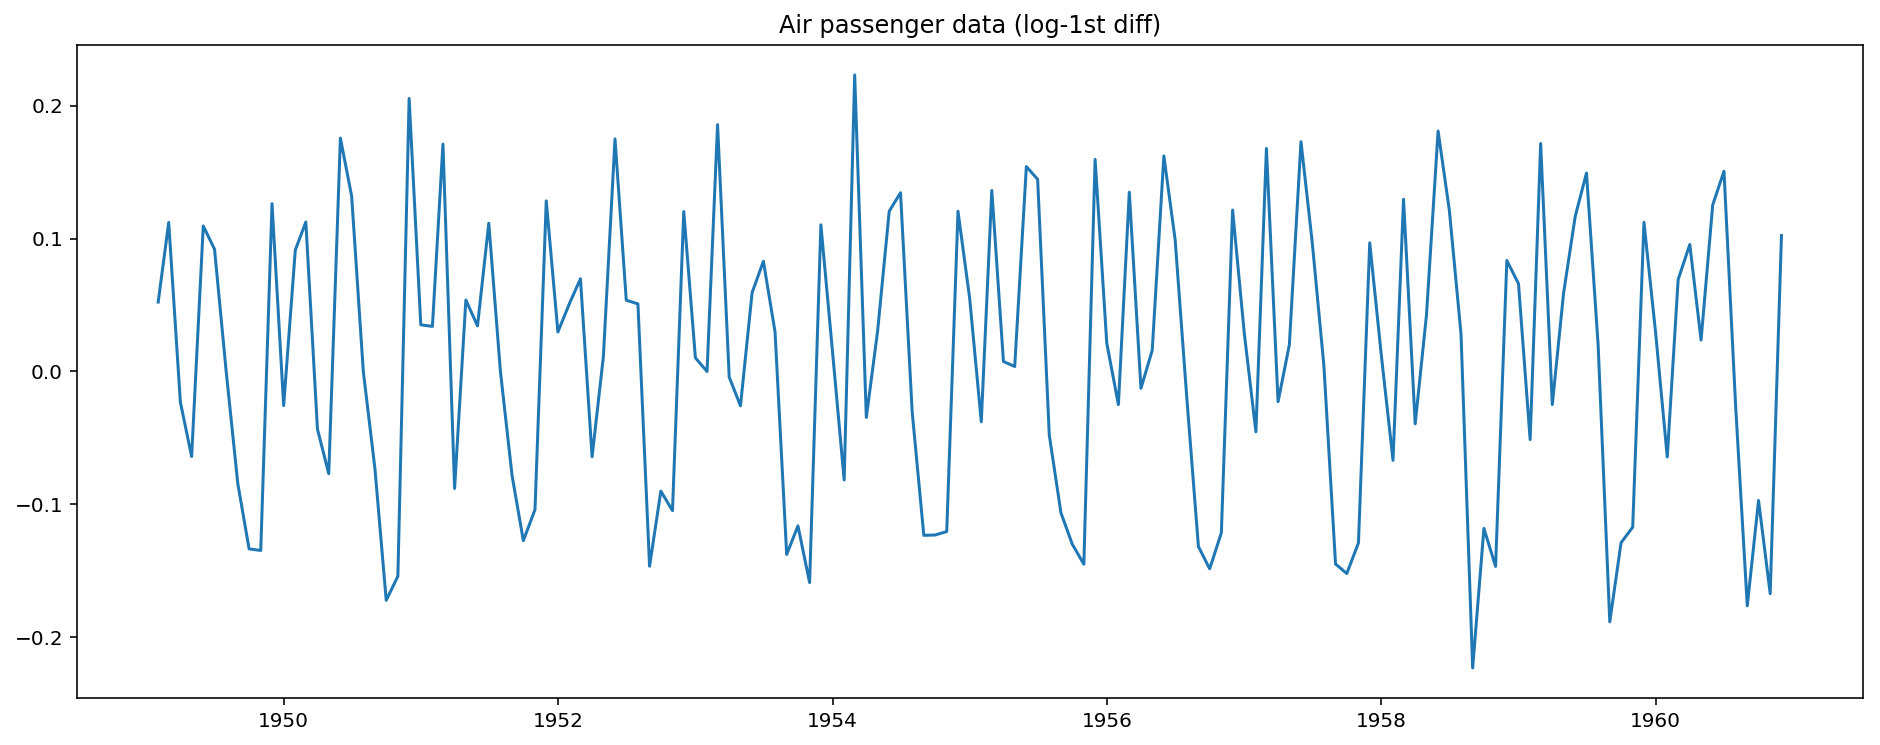

In [27]:
# log first order diff
plt.figure()
plt.plot(ts_log_diff)
plt.title("Air passenger data (log-1st diff)");

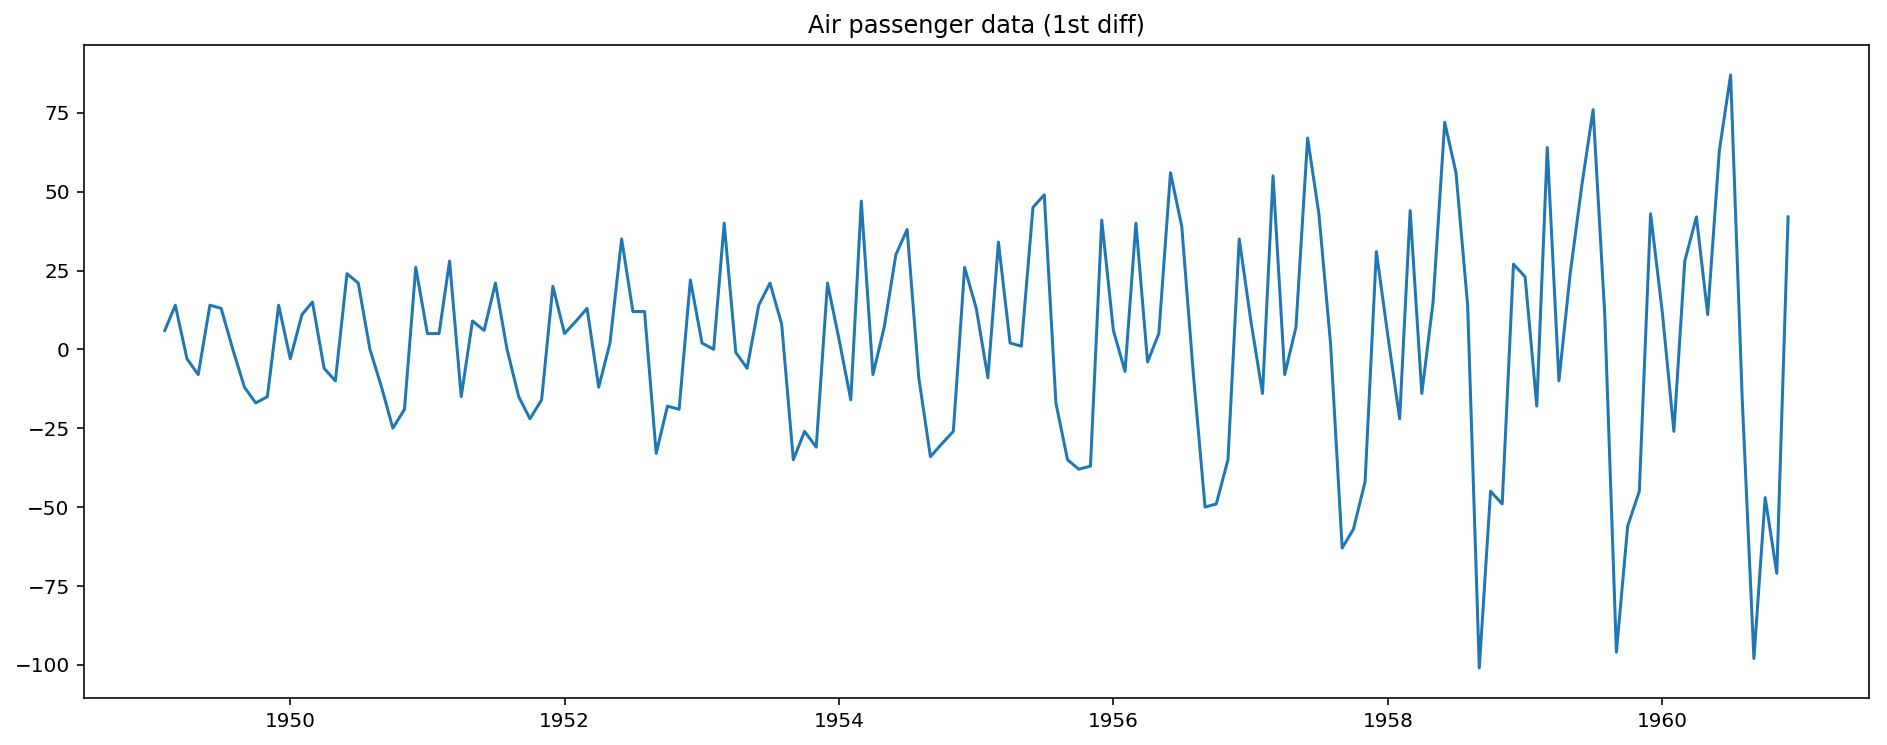

In [28]:
# first order diff
plt.figure()
plt.plot(ts - ts.shift())
plt.title("Air passenger data (1st diff)");

We can see the $1^{st}$ order log difference plot remains the <span class="girk">same mean value and the variance does not change significantly</span>. In this case, we can call this data as stationary data. Then we could set the d=1 in ARIMA.  

To ensure that the transformed series is stationary, we may carefully check its sample ACF. We do it in the following step.

#### Step 4. ACF and PACF of the 1st differencing data

Then we examine the ACF and PACF plot to obtain a suitable order for AR(p) and MA(q) process.

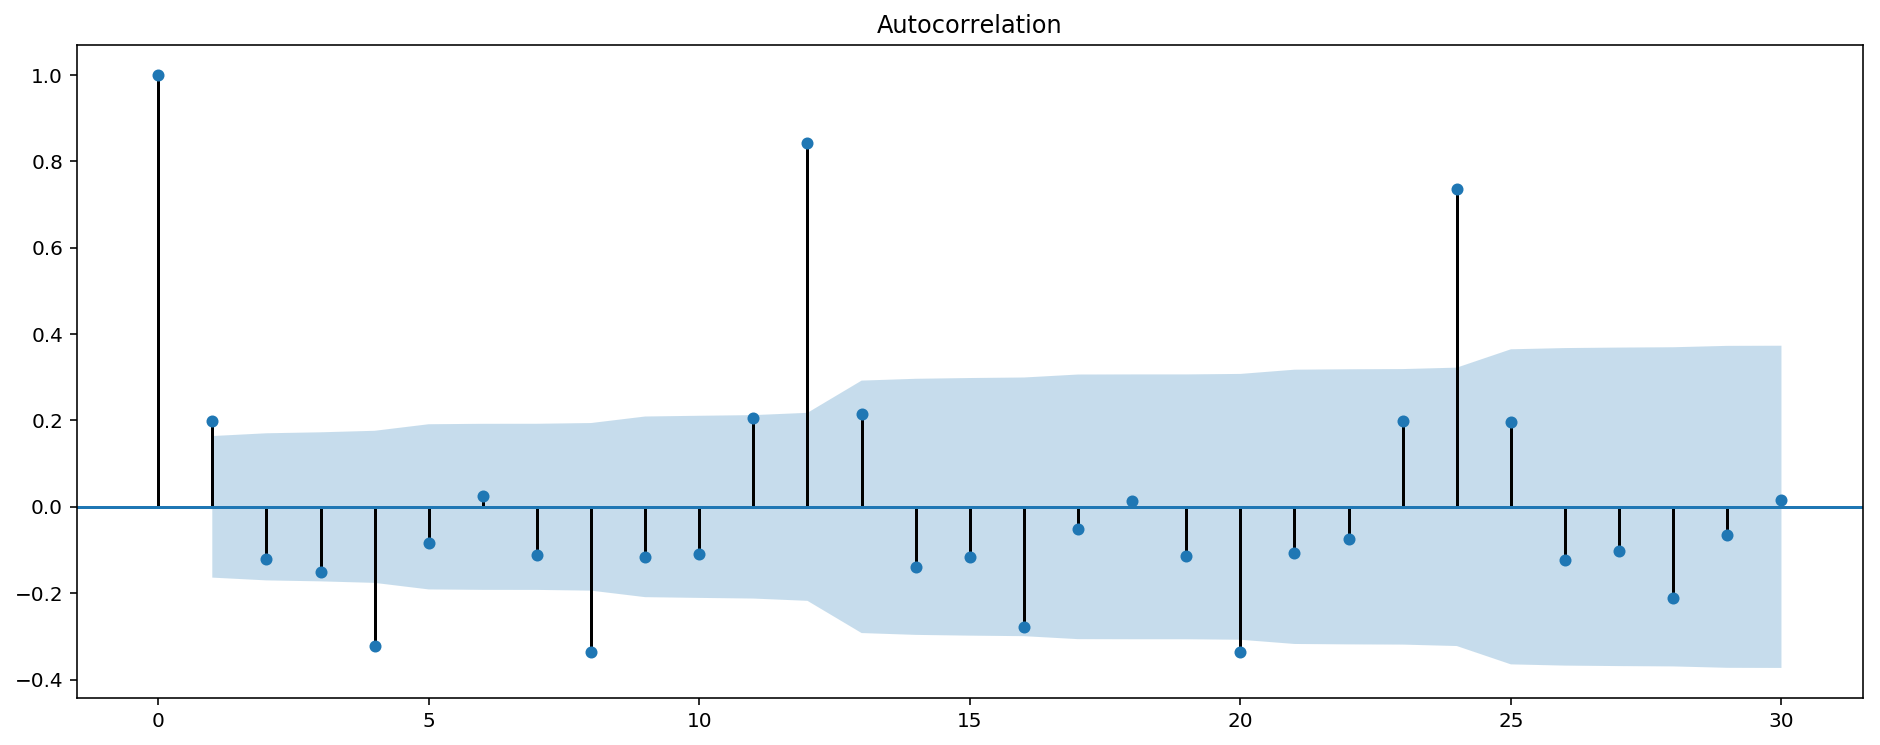

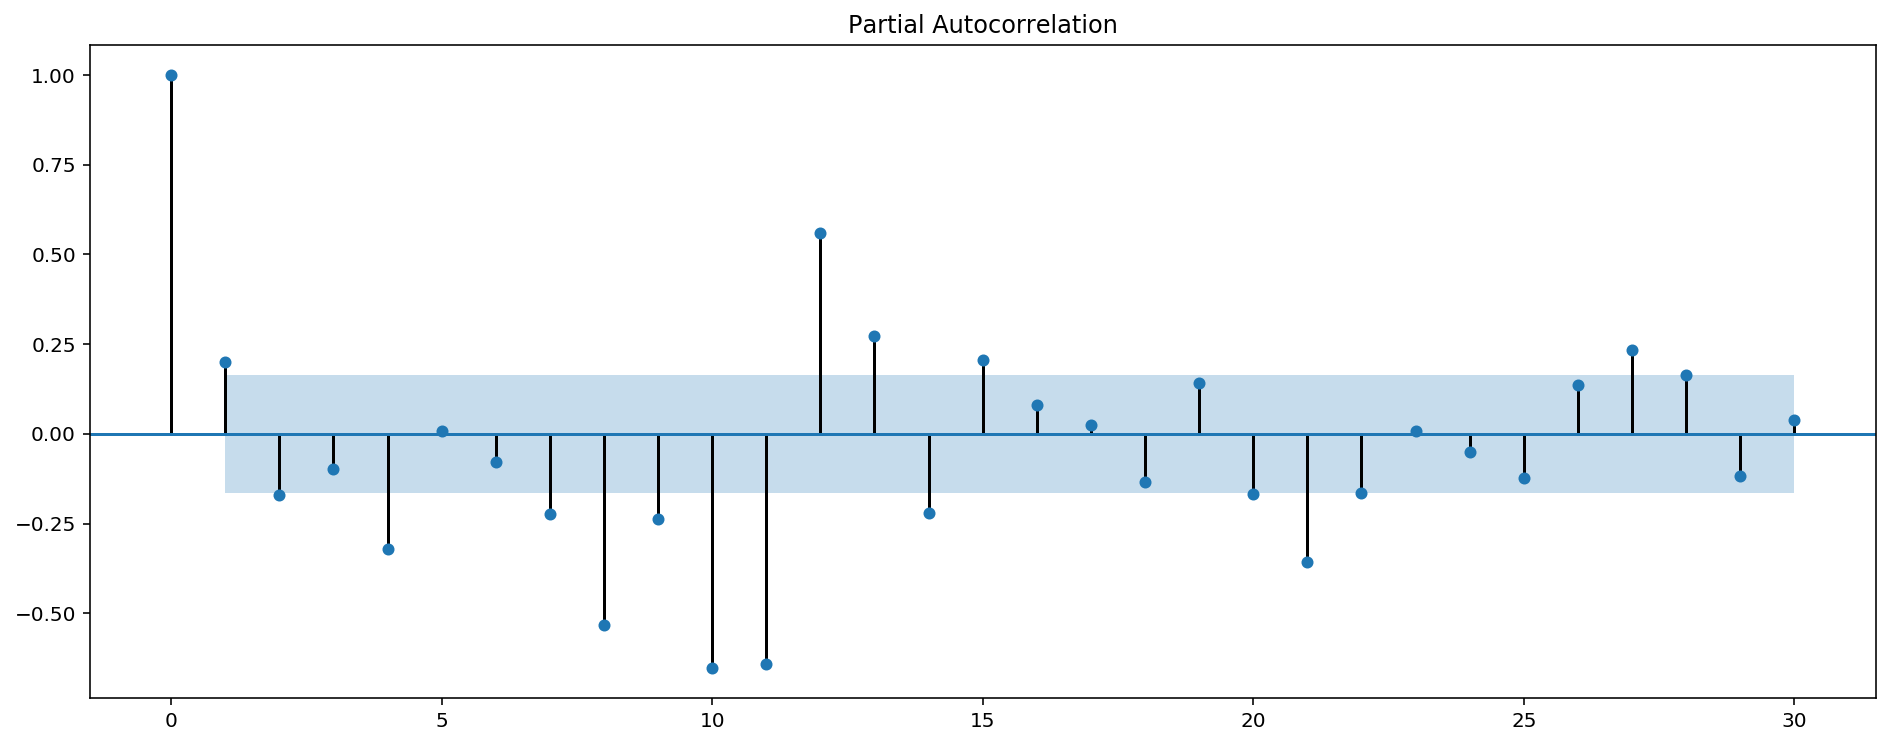

In [29]:
smt.graphics.tsa.plot_acf(ts_log_diff, lags=30, alpha = 0.05)
smt.graphics.tsa.plot_pacf(ts_log_diff, lags=30, alpha = 0.05);

Examine the PACF plot, what is the suitable order p for AR process?  

In [ ]:
# find p from PACF plot
# p = 2

Examine the ACF plot, what is the suitable order q for MA process?

In [ ]:
# find q from ACF plot
# q = 0

As this time series contains seasonal component, we can see the big spikes at lag 12, 24 etc. We will handle this in the next tutorial. For our purpose of showing how to do ARIAM modeling, we decide to select p = 2 and q = 0. That is we are looking at <span class="girk">ARIMA(2,1,0)</span>.  

#### Step 5. Plot the AR(2) of the differenced data = ARIMA(2,1,0)

Run the following code and check the fitted results.

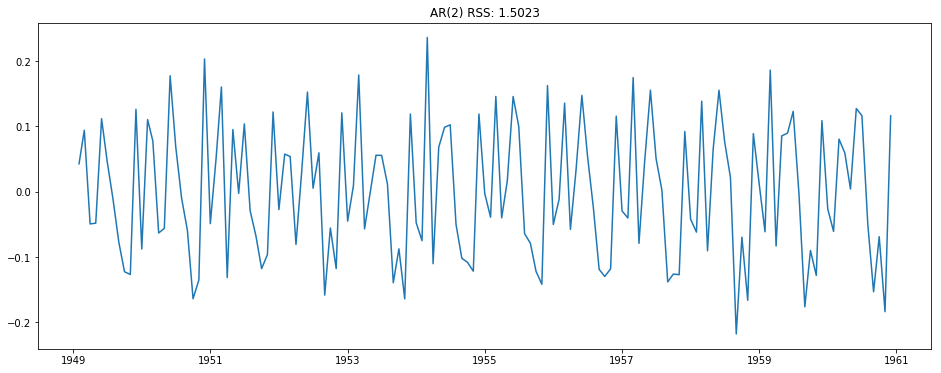

In [24]:
from statsmodels.tsa.arima_model import ARIMA

# AR(2) model
model = ARIMA(ts_log, order = (2, 1, 0))  

# fitting the ts_log data
results_AR = model.fit(disp = -1) # disp < 0 means no output
residuals = pd.DataFrame(results_AR.resid) 

# check the residual
plt.figure() 
plt.plot(residuals)
plt.title('ARIMA(2,1,0) RSS: %.4f'% sum((results_AR.resid.values)**2)); # residual sum of square

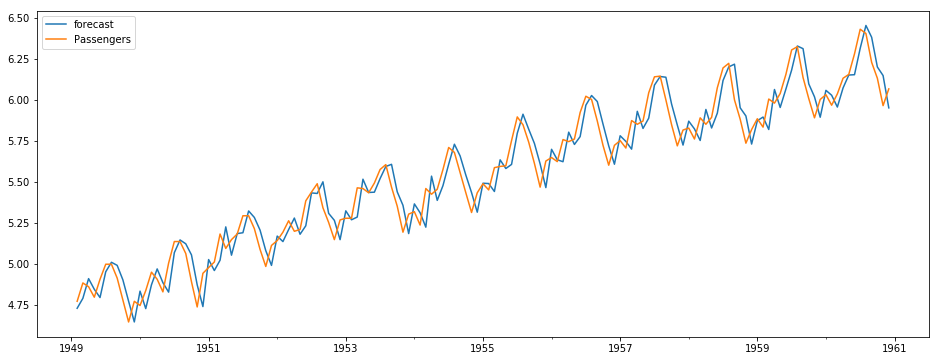

In [25]:
# Get Fitted Series
# typ = 'levels': predict the levels of the original time series.
# dynamic = False: the in-sample lagged values are used for prediction
fitted = results_AR.predict(typ = 'levels', dynamic = False)

# Actual vs Fitted 
results_AR.plot_predict(dynamic = False) 
plt.show(); 

<span class="burk">Question: Why we need to input ts_log for ARIMA rather than ts_log_diff?</span>

In [ ]:
# ARIMA(2,1,0) for ts_log = ARIMA(2,0,0) for ts_log_diff

In [ ]:
# diff
modelling:
    - dependent variable? 
    -   y_t
        y_t - y_{t-1}
        
# ts_log_diff, ARIMA(2,0,0)
yt_diff = c + phi1*y_diff_t-1 + phi2 * y_diff_t-2 + noise
yt_diff = yt - yt-1
# prediction: yt_diff, yt - yt-1 -> yt

# ts_log, ARIMA(2,1,0)
yt = c + phi1*(y_t-1 - y_t-2) + phi2 * (y_t-2 - y_t-3) + noise + y_t-1

# prediction, yt 

Below are the example on how to scale back to the original data.

In [ ]:
# predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
# print(predictions_ARIMA_diff.head())
 
# predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
# print(predictions_ARIMA_diff_cumsum.head())
 
# predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
# predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
 
# predictions_ARIMA = np.exp(predictions_ARIMA_log)
# plt.figure()
# plt.plot(ts,label="Original data")
# plt.plot(predictions_ARIMA,label = "ARIMA fitted")
# plt.title('ARIMA(2,1,1) RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
# plt.legend()

#### Step 6. Using AIC to select best fitting AR and MA order 

AIC function is useful in selecting predictors for regression. It is also useful for <span class="girk">determining the order of an ARIMA model</span>.

From statsmodel library, you can call `arma_order_select_ic()` function to select the best fitting order of an ARIMA model:

In [27]:
import statsmodels.tsa.stattools as st

# try p*q combinations
# p = 0, 1, ..., maxP
# q = 0, 1, ..., maxq
order = st.arma_order_select_ic(ts_log_diff, max_ar = 5, max_ma = 5, ic=['aic'])
# arima(4,0,3)
# bic: arima(3,0,1)

# p and q values with minimum aic
print(order.aic_min_order)

(4, 3)


Alternatively, you can call BIC criteria by setting the `ic = [‘bic’]`

Note: calling the above function is time consuming. You don’t need to run the above code, as it will take around 30 minutes to 1 hour to finish training. Therefore, <span class="girk">avoid setting a large value of `max_ar` or `max_ma`</span> if you want to use AIC or BIC to select the order number.

According to the result, the best fitting order is p = 15, q = 0. We take this order in the ARIMA process and compare the fitted series and the Actual curve.

In [29]:
p,q = order.aic_min_order[0], order.aic_min_order[1]
# or you can directly assign p,q with 15,0 without training
# p, q = 15, 0

model_AIC = ARIMA(ts_log, order = (p, 1, q))  
results_AIC_ARIMA = model_AIC.fit(disp = -1)

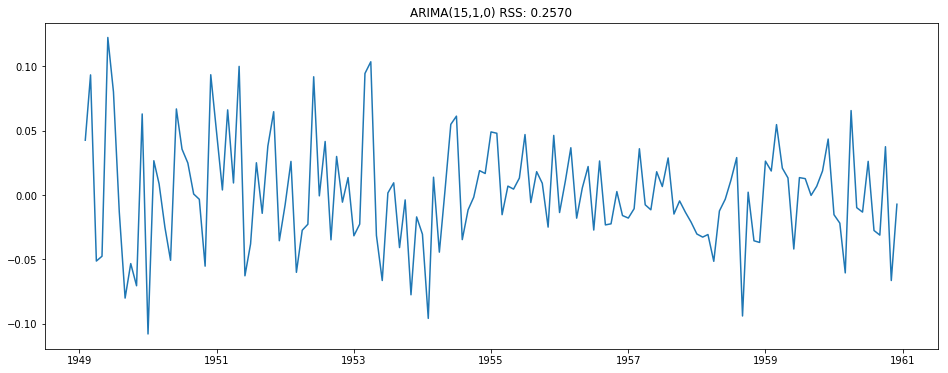

In [31]:
residuals_AIC = pd.DataFrame(results_AIC_ARIMA.resid)

plt.figure() 
plt.plot(residuals_AIC)
plt.title('ARIMA(15,1,0) RSS: %.4f'% sum((results_AIC_ARIMA.resid.values)**2));

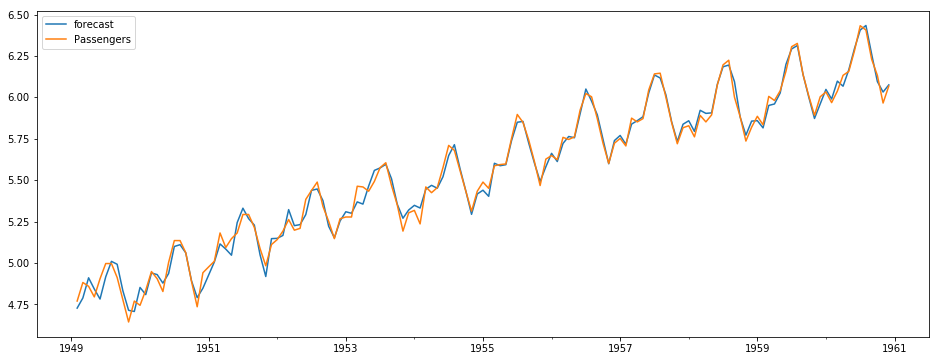

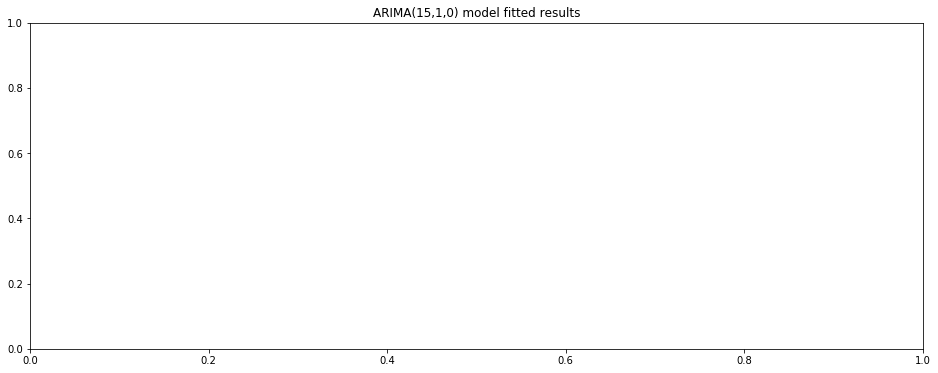

In [33]:
# Get Fitted Series
fitted_AIC = results_AIC_ARIMA.predict(typ = 'levels', dynamic = False)

# Actual vs Fitted 
results_AIC_ARIMA.plot_predict(dynamic=False) 
plt.show()
plt.title("ARIMA(15,1,0) model fitted results");

**key words**  
1. check invertibility    
`ma_model.isstationary`  
`ma_model.isinvertible`
  
  
2. generate ARIMA process    
`sm.tsa.arima_process.ArmaProcess(ar = ar, ma = ma)`   
`arma_model.generate_sample(n_samples)`


3. choose the best order   
<span class="girk">#find the best</span>  
`import statsmodels.tsa.stattools as st`  
`st.arma_order_select_ic(df, max_ar, max_ma, ic=['aic'])`    
<span class="girk">#use the one and make the prediction</span>  
<span class="mark">#fit</span>  
`p,q = model.aic_min_order[0], order.aic_min_order[1]`  
`ARIMA(ts_log, order = (p, 1, q)).fit(disp = -1)`   
<span class="mark">#predict</span>  
`best_model.predict(typ = 'levels', dynamic = False)`